In [1]:
%matplotlib inline
import random, math, pylab, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

dpi_out = 400
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
#fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 8
small_label_size = 8

## Naive direct sampling

In [3]:
N = 5
L = 1.0
sigma = 0.075
n_configs = 10

for config in range(n_configs):
    n_trials = 0
    x = []
    while len(x) < N:
        x.append(random.uniform(sigma, L - sigma))
        for k in range(len(x) - 1):
            if abs(x[-1] - x[k]) < 2.0 * sigma:
                x = []
                break
    print np.array(x), '\n'
    print n_trials

[ 0.85759751  0.07840839  0.2388218   0.65963062  0.4106989 ] 

0
[ 0.14336096  0.9009431   0.31421828  0.48635715  0.74895076] 

0
[ 0.85780642  0.30130328  0.13237374  0.68402231  0.49402716] 

0
[ 0.08249079  0.62577471  0.45887718  0.79149378  0.293031  ] 

0
[ 0.12020716  0.67243797  0.51331818  0.32109173  0.90534344] 

0
[ 0.72210935  0.24414697  0.56060164  0.39684556  0.08877134] 

0
[ 0.1180021   0.87735417  0.27041937  0.60659993  0.43263177] 

0
[ 0.47713032  0.2895677   0.1391688   0.66125285  0.89317116] 

0
[ 0.10996357  0.88132927  0.28460015  0.54693463  0.72910312] 

0
[ 0.0910402   0.74522441  0.91562725  0.32698197  0.48000649] 

0


## Improved direct sampling

In [4]:
N = 5
L = 1.0
sigma = 0.075
n_configs = 10
for config in range(n_configs):
    n_trials = 0
    while True:
        n_trials += 1
        x = [random.uniform(sigma, L - sigma) for k in range(N)]
        x.sort()
        min_dist = min(x[k + 1] - x[k] for k in range(N - 1))
        if min_dist > 2.0 * sigma:
            print x, '\n'
            print n_trials
            break

[0.23619646743482003, 0.3945535691906775, 0.5465232477391015, 0.7383761487048784, 0.9217244663223341] 

352
[0.10203663980741867, 0.32246690470850753, 0.5587908048719646, 0.7103235094140313, 0.8815183417377928] 

586
[0.08791433358798084, 0.28946145707285925, 0.4483956625283963, 0.6142564708786457, 0.8997042886025678] 

892
[0.10204744350911063, 0.3407930092932749, 0.5040716836228485, 0.6651324758776344, 0.8641997274021881] 

100
[0.14688551524697627, 0.3082866513999274, 0.5465151470335426, 0.7447855262149643, 0.9182606184464547] 

55
[0.09722348826806393, 0.29714637848926345, 0.4713927256928262, 0.6232611226094567, 0.8178062686938262] 

93
[0.08861554284362935, 0.26152774821289904, 0.4467076914224524, 0.6656148140971274, 0.8236633892147583] 

1996
[0.08056581938037058, 0.28049868528614585, 0.43117560071257877, 0.7286052468566875, 0.889253990205173] 

492
[0.08763010357720545, 0.3814428641844199, 0.5440246159711601, 0.7283564569345032, 0.9035270659011719] 

227
[0.09190500249396837, 0.

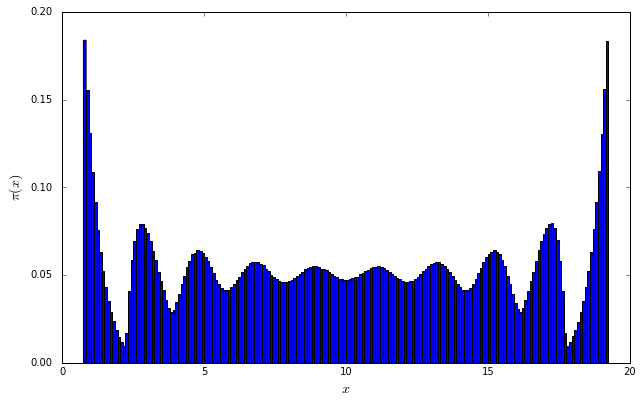

In [5]:
import random, pylab

N = 10
L = 20.0
sigma = 0.75
n_runs = 1000000
data = []
for run in range(n_runs):
    y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)]
    y.sort()
    data += [y[i] + (2 * i + 1) * sigma for i in range(N)]
    
fig, ax = plt.subplots(figsize = (fig_width*3, fig_height*3), dpi=400, frameon=True)
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$\pi(x)$', fontsize=14)
#pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))
pylab.hist(data, bins=200, normed=True)
pylab.savefig('plot_direct_pins_noreject.pdf')
pylab.show()


![Configuration A](./density_compare.png "Phase transition")